#  CS251: Data Analysis and Visualization

## 2D Rotation matrices

Spring 2023

Oliver W. Layton

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

# plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

In [2]:
import data
import analysis

### 2D rotation (T-shaped data)

Load in tData.csv

In [3]:
dobj = data.Data( 'data/tData.csv')
print(dobj.get_headers())

['x', 'y']


Let's make a scatterplot to see what the (x, y) data looks like

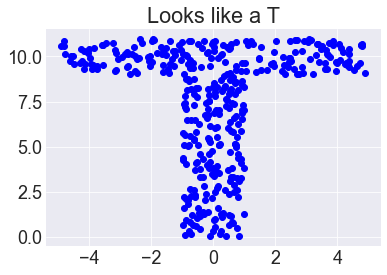

In [4]:
aobj = analysis.Analysis( dobj )
aobj.scatter( 'x', 'y', 'Looks like a T');

In [5]:
def rotation_matrix_2D(angle):
    '''Creates a 2D rotation matrix
    
    Parameters:
    -----------
    angle: float. Rotation angle in degrees.
    
    Returns:
    -----------
    ndarray. shape=(3, 3). The 2D rotation matrix with homogeneous coordinate.
    '''
    rad = np.deg2rad(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad), np.cos(rad),  0],
                  [0,            0,           1]])
    return R

Let's grab the raw t-shaped data as an ndarray and add a homogenous coordinate.

In [6]:
tmat = dobj.select_data( ['x','y'])
#print(tmat)
Dh = np.hstack((tmat, np.ones( (tmat.shape[0], 1) ) ) ) 
# print(Dh)

TODO:
- Pick any rotation angle we want and create the appropriate rotation matrix.
- Apply the rotation transform to the data.
- Plot the data after the transformation has been applied.

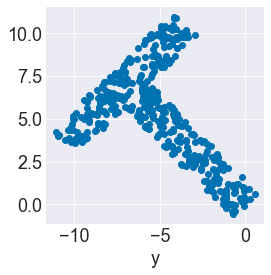

In [7]:
angle = 45
R = rotation_matrix_2D(angle)
#print(R)
Drotated = (R @ Dh.T).T
# print(Drotated)
plt.scatter( Drotated[:,0], Drotated[:,1])
plt.xlabel( 'x' )
plt.xlabel( 'y' )
ax = plt.gca()
ax.set_aspect('equal')